## **Introduction**

The Telco Customer Churn dataset is designed to predict customer behavior, particularly focusing on customer retention. It provides a comprehensive overview of the various factors that influence whether a customer will continue using a company's services or leave, which is crucial for developing targeted retention strategies.

### **Context**

This dataset, provided as part of IBM's sample data sets, is structured to help businesses analyze relevant customer data to identify patterns that may indicate a likelihood of churn. By understanding these patterns, companies can implement focused customer retention programs, ultimately reducing churn and increasing customer loyalty.

### **Content**

The dataset includes detailed information about each customer, covering various aspects:

- **Churn Status**: The primary focus of the dataset is on customers who left the company within the last month. This is indicated in the `Churn` column, where a 'Yes' means the customer churned, and 'No' means they stayed.

- **Services Signed Up**: This includes details on the services each customer has subscribed to, such as phone service, multiple lines, internet service, online security, online backup, device protection, technical support, and streaming services (TV and movies).

- **Customer Account Information**: Important account-related details include the tenure (how long the customer has been with the company), the type of contract (e.g., month-to-month, one year, two years), payment method, whether they use paperless billing, and financial metrics like monthly charges and total charges.

- **Demographic Information**: This section contains basic demographic data such as gender, whether the customer is a senior citizen, and if they have partners or dependents.

### **Purpose of the Analysis**

The goal of analyzing this dataset is to uncover key factors that contribute to customer churn. By identifying these factors, businesses can tailor their customer retention efforts, focusing on the most at-risk customers and addressing their specific needs and concerns.

### **Data Loading and Overview**

First we will import all necessary libraries used in EDA and data visualization such as pandas, numpy,seaborn, matplotlib. 
Then Load the Telco Customer Churn dataset.
Display the first few rows to get an initial sense of the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### **Changing Data type of target variable**

In [4]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

### **Basic Statistics**

In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### **Checking For Missing Values**

In [6]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- As there are 11 missing value in total charges so we haveto handled it either by removing these rows for filling these values

### **Handling Missing Values**
- As the dataset has 7,043 rows and only 11 missing values in the TotalCharges column, removing these rows is unlikely to significantly impact the overall analysis.
- This approach reduces the dataset to 7,032 rows, which is still substantial for analysis.

In [7]:
# Removing rows with missing values in TotalCharges
data = data.dropna(subset=['TotalCharges'])

## **Exploration of Demographic Features:**

### **Gender Distribution:**
- Visualize the distribution of the gender feature.
- Analyze the relationship between gender and Churn.



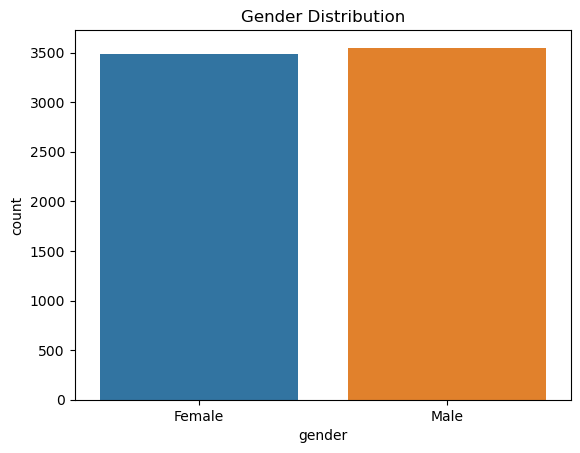

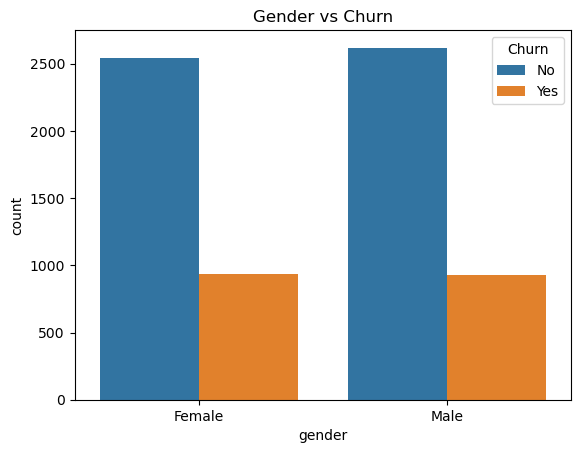

In [8]:
sns.countplot(x='gender', data=data)
plt.title('Gender Distribution')
plt.show()

sns.countplot(x='gender', hue='Churn', data=data)
plt.title('Gender vs Churn')
plt.show()


### **Senior Citizen:**

- Examine the distribution of SeniorCitizen.
-  Analyze how being a senior citizen correlates with churn.

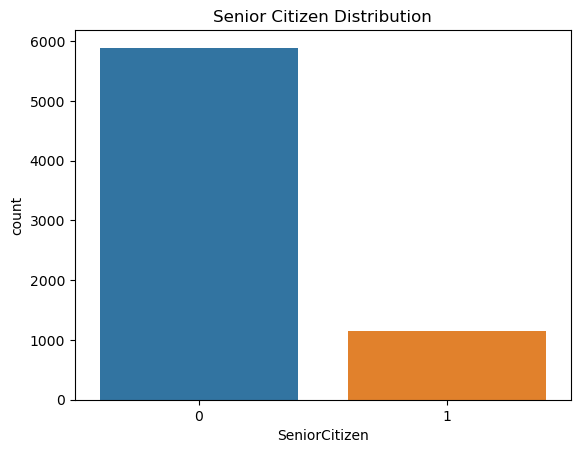

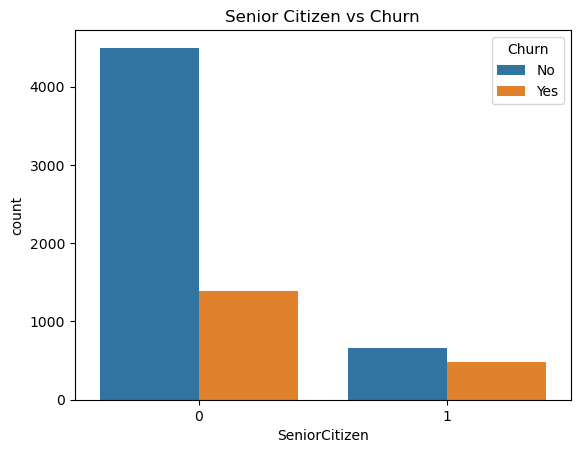

In [9]:
sns.countplot(x='SeniorCitizen', data=data)
plt.title('Senior Citizen Distribution')
plt.show()

sns.countplot(x='SeniorCitizen', hue='Churn', data=data)
plt.title('Senior Citizen vs Churn')
plt.show()


### **Partner and Dependents:**

- Explore the Partner and Dependents features.
- Visualize their relationship with churn.

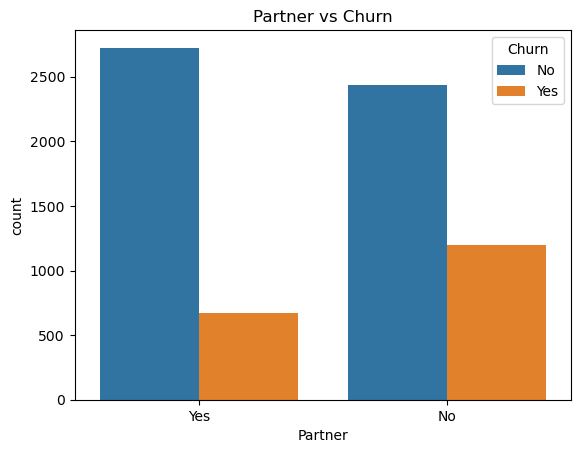

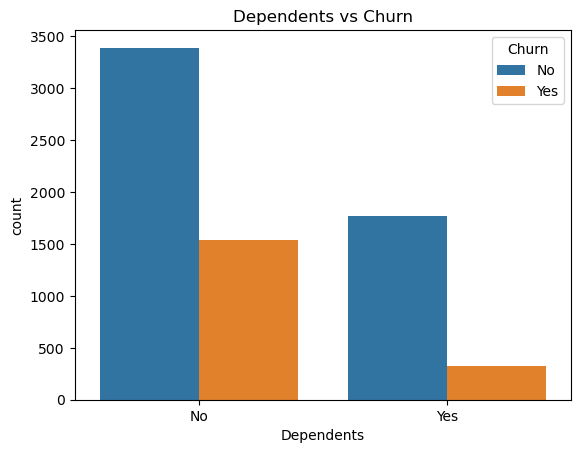

In [10]:
sns.countplot(x='Partner', hue='Churn', data=data)
plt.title('Partner vs Churn')
plt.show()

sns.countplot(x='Dependents', hue='Churn', data=data)
plt.title('Dependents vs Churn')
plt.show()


## **Exploration of Service Features:**


### **Phone Service and Multiple Lines:**
- Visualize and analyze the PhoneService and MultipleLines features.

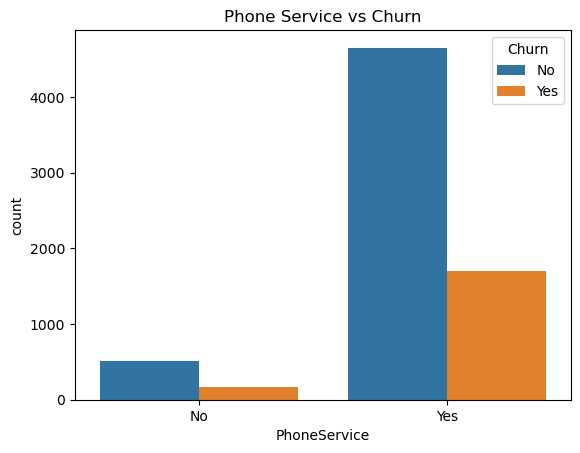

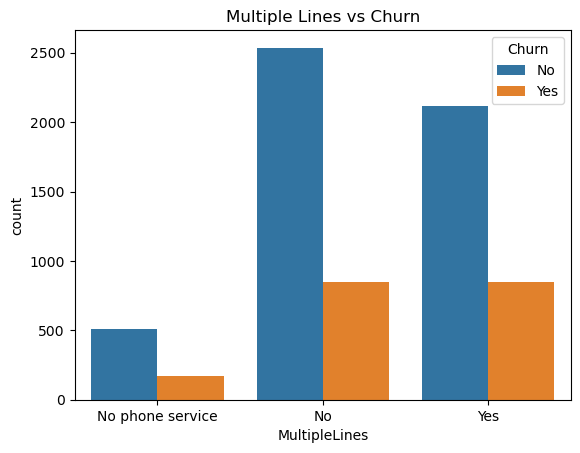

In [11]:
sns.countplot(x='PhoneService', hue='Churn', data=data)
plt.title('Phone Service vs Churn')
plt.show()

sns.countplot(x='MultipleLines', hue='Churn', data=data)
plt.title('Multiple Lines vs Churn')
plt.show()


### **Internet Service:**

- Explore the InternetService feature and its sub-services.

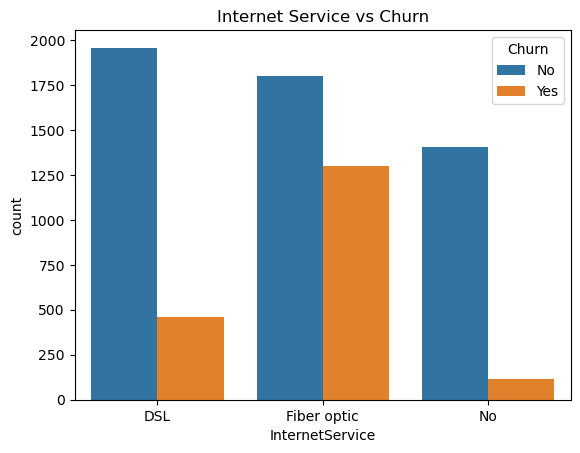

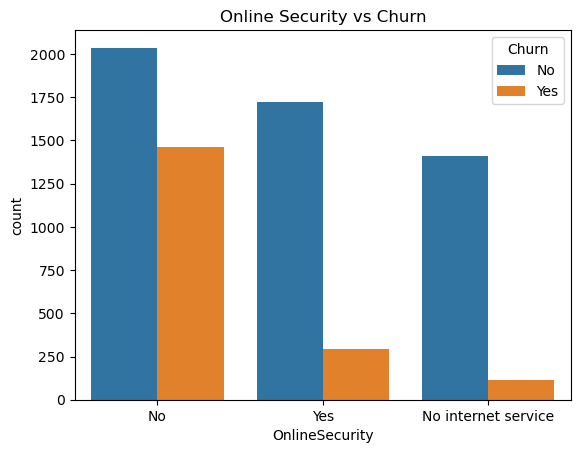

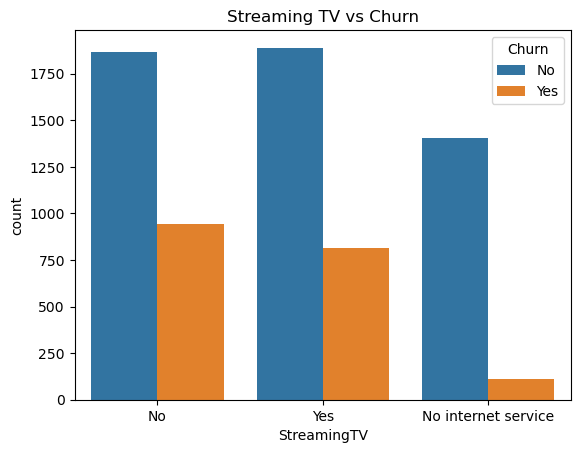

In [12]:
sns.countplot(x='InternetService', hue='Churn', data=data)
plt.title('Internet Service vs Churn')
plt.show()

sns.countplot(x='OnlineSecurity', hue='Churn', data=data)
plt.title('Online Security vs Churn')
plt.show()

sns.countplot(x='StreamingTV', hue='Churn', data=data)
plt.title('Streaming TV vs Churn')
plt.show()


## **Exploration of Account Features:**

### **Tenure:**

- Analyze the tenure feature to see how long customers have been with the company.
- Use a box plot to visualize tenure vs Churn.

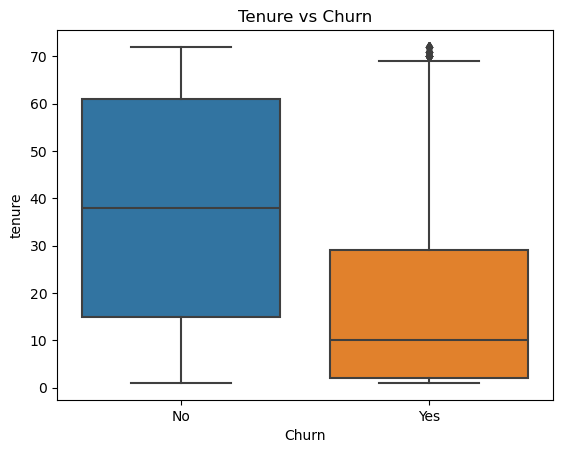

In [13]:
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Tenure vs Churn')
plt.show()


### **Contract Type:**

- Explore the Contract feature and its relationship with churn.

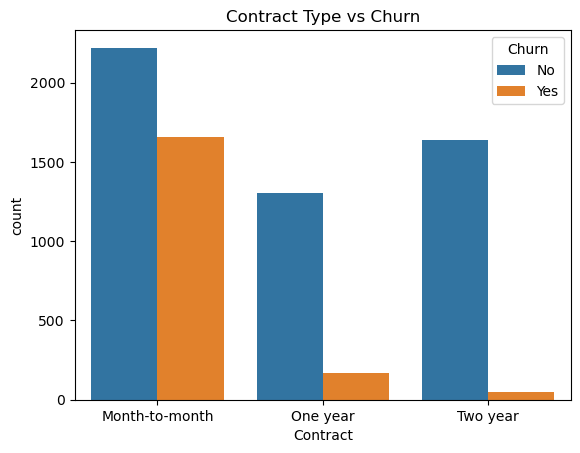

In [14]:
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Contract Type vs Churn')
plt.show()

### **Monthly Charges and Total Charges:**

- Use box plots to visualize MonthlyCharges and TotalCharges against churn.

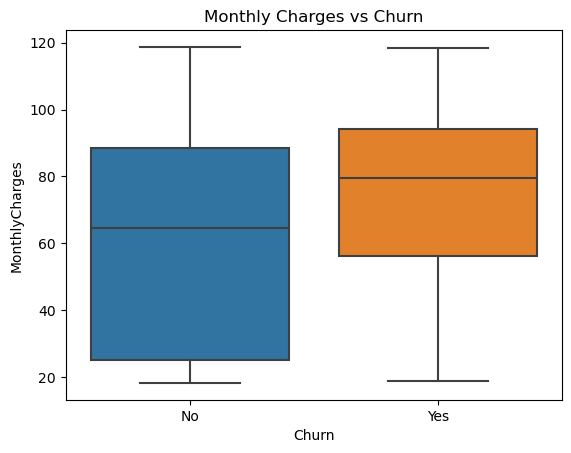

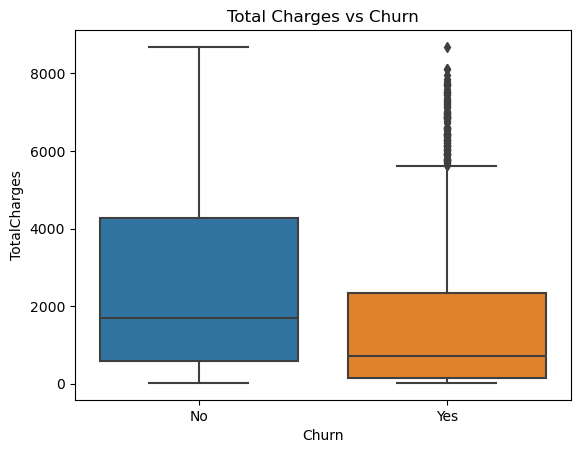

In [15]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges vs Churn')
plt.show()

sns.boxplot(x='Churn', y='TotalCharges', data=data)
plt.title('Total Charges vs Churn')
plt.show()


## **Understanding the Target Variable:**


### **Churn Distribution:**

- Visualize the distribution of the target variable Churn.

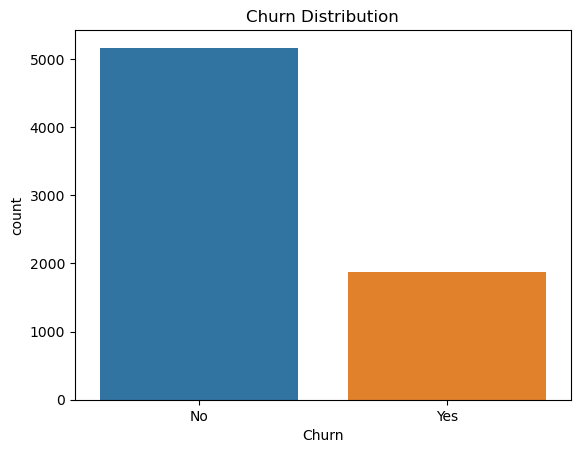

In [16]:
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()


### **Handling Outliers**
- Identify potential outliers in numerical features using Histogram.


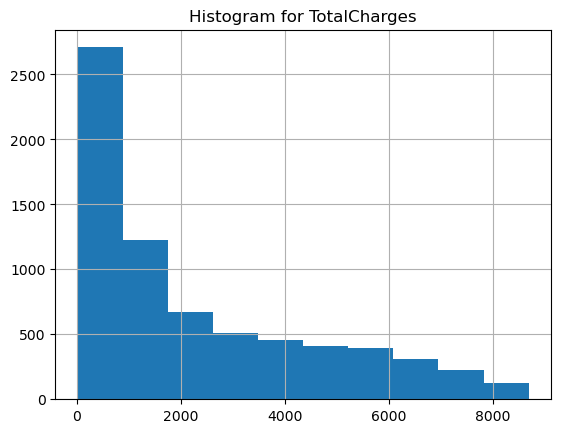

In [17]:
data['TotalCharges'].hist()
plt.title('Histogram for TotalCharges')
plt.show()


- As this Histogram is right skewed which means there are outliers in data we can identify the outliers using Zscore method

In [30]:
# Calculate Z-scores for TotalCharges
from scipy.stats import zscore
z_scores = zscore(data['TotalCharges'].dropna())

# Define the threshold for identifying outliers
threshold = 3

# Identify and remove outliers
outliers = data[(np.abs(z_scores) > threshold)]
data_cleaned = data[(np.abs(z_scores) <= threshold)]



In [31]:
outliers = data[(np.abs(z_scores) > threshold)]
print(outliers['TotalCharges'])



Series([], Name: TotalCharges, dtype: float64)


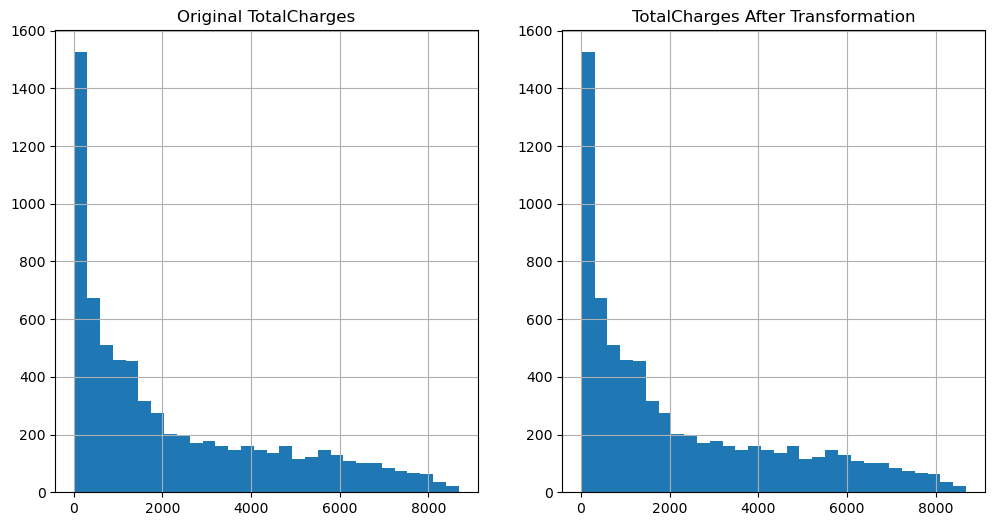

In [32]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
data['TotalCharges'].hist(bins=30)
plt.title('Original TotalCharges')

plt.subplot(1, 2, 2)
data_cleaned['TotalCharges'].hist(bins=30)
plt.title('TotalCharges After Transformation')

plt.show()


As the histogram remain same after outlier analysis we will proceed furthur because Sometimes, skewed data is normal and expected, especially in financial datasets

### **Descriptive Statistics of Total Charges**

In [33]:
data_cleaned['TotalCharges'].describe()


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

### **Correlation Analysis**

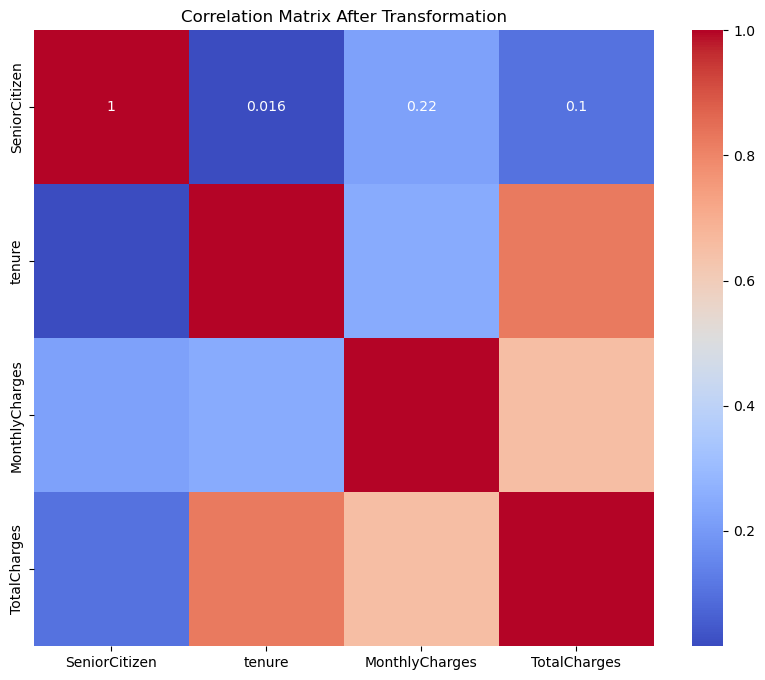

In [40]:
numeric_data = data_cleaned.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix After Transformation')
plt.show()

### **Segmented Analysis:**

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_16176\3365425326.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = data_cleaned.groupby('TotalCharges_Category')['Churn'].mean()


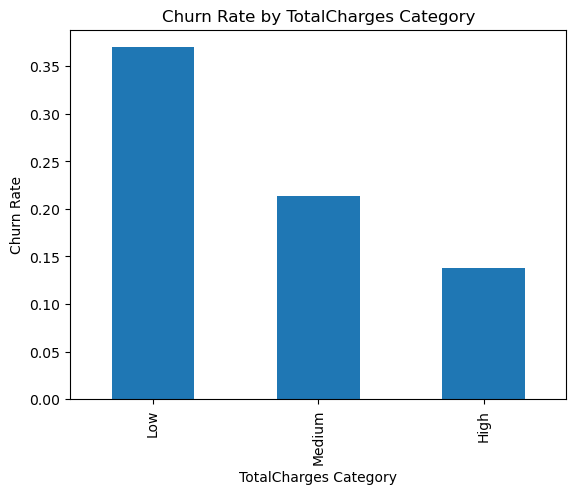

In [52]:
data_cleaned['TotalCharges_Category'] = pd.cut(data_cleaned['TotalCharges'],
                                               bins=[0, 1000, 5000, 10000],
                                               labels=['Low', 'Medium', 'High'])
data_cleaned['Churn'] = data_cleaned['Churn'].replace({'Yes': 1, 'No': 0})
churn_rate_by_category = data_cleaned.groupby('TotalCharges_Category')['Churn'].mean()
churn_rate_by_category.plot(kind='bar')
plt.title('Churn Rate by TotalCharges Category')
plt.xlabel('TotalCharges Category')
plt.ylabel('Churn Rate')
plt.show()


## **Identify patterns and potential predictors of churn.**

### **Churn Distribution**

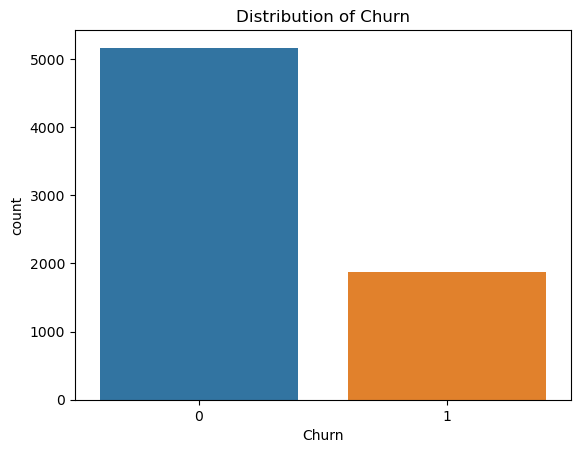

In [50]:
sns.countplot(x='Churn', data=data_cleaned)
plt.title('Distribution of Churn')
plt.show()